In [ ]:
from google.colab import drive

In [ ]:
!pip install -Uq fastai

     |████████████████████████████████| 188 kB 5.3 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 


In [ ]:
import fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 42.8 MB/s 
Mounted at /content/gdrive


In [ ]:
fruits = 'Apples', 'Bananas', 'Oranges'

In [ ]:
path = 'gdrive/MyDrive/Fruits'
p_path = Path(path)
fns = get_image_files(path)
fns

(#225) [Path('gdrive/MyDrive/Fruits/Apples/apple_10.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_12.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_11.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_1.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_23.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_25.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_19.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_2.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_18.jpg'),Path('gdrive/MyDrive/Fruits/Apples/apple_28.jpg')...]

In [ ]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i,self: self[i])

In [ ]:
FRUITS = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
  get_y=parent_label,
  item_tfms=Resize(128))

In [ ]:
dls = FRUITS.dataloaders(path)


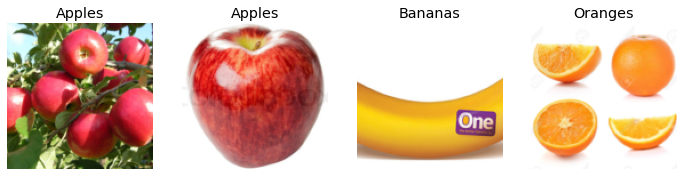

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.894089,0.845980,0.244444,00:32


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.096299,0.454413,0.222222,00:05
1,0.843671,0.235754,0.066667,00:05
2,0.614250,0.129964,0.022222,00:05
3,0.477148,0.099035,0.022222,00:07


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

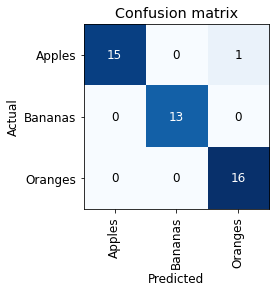

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

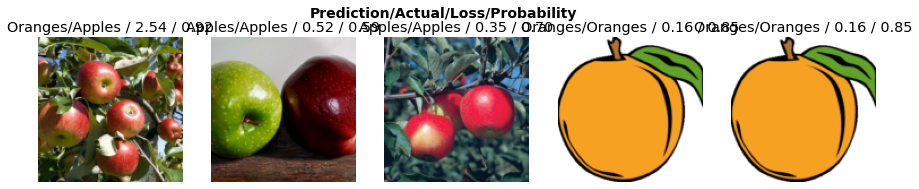

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')
#Output (#1) [Path('export.pkl')]

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['Apples', 'Bananas', 'Oranges']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Apples; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your image!'),
btn_upload, btn_run, out_pl, lbl_pred])